<a href="https://colab.research.google.com/github/VensaHerald/titania/blob/master/titania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/VensaHerald/titania/master/train.csv"
df_t = pd.read_csv(url)
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Did more men or women die on the Titanic


In [4]:
df_t[df_t["Survived"]==0]["Sex"].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [5]:
df_t[df_t["Age"].isna()].shape[0]/df_t.shape[0]

0.19865319865319866

###What was the average age of those who died, and those who survived?
Before I can answer this, I need to sort out the data. From the above cell we can see that there are 20% rows missing age data.  So I will need to drop these from the dataset before beginning


In [6]:
df_dr_age = df_t.dropna(subset=["Age"])
df_dr_age[df_dr_age["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Now these values have been dropped we can look at this column in more detail.  We'll do a histogram to get the lay of the land regarding the distribution of each group (whole pop, survived, non-survived).  And then produce the values of the mean at the end.

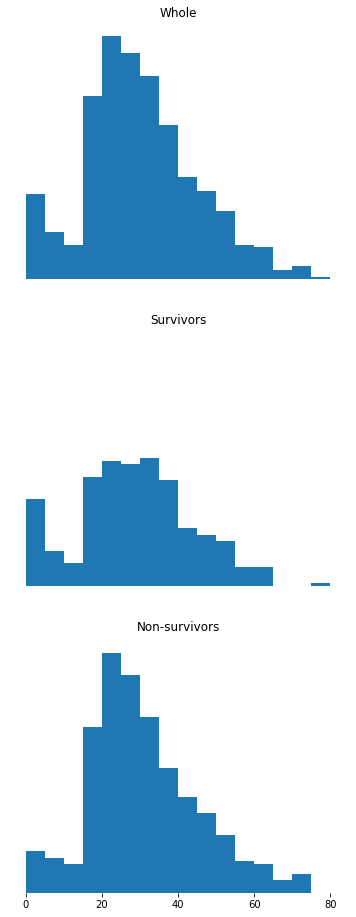

In [39]:
survived = df_dr_age[df_dr_age["Survived"] == 1]
died = df_dr_age[df_dr_age["Survived"] == 0]
titles = ["Whole","Survivors","Non-survivors"]
fig = plt.figure(figsize=(6,16))

for a in range(0,3):
    ax = fig.add_subplot(3,1,a+1)
    ax.set_ylim(0,80)
    ax.set_title(titles[a])
    ax.tick_params(bottom=False, right=False, top=False, left=False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)

    if a == 0:
        ax.hist(df_dr_age["Age"], range=(0,80),bins=16)
        ax.set_ylim((0,120))
        
    elif a == 1:
        ax.hist(survived["Age"], range=(0,80), bins=16)
    else:
        ax.hist(died["Age"], range=(0,80),bins=16)
        ax.tick_params(bottom=True)
        ax.set_xticks([0,20,40,60,80])


In [38]:
mean_sur = round(survived["Age"].mean(),2)
mean_nsur = round(died["Age"].mean(),2)
print("Mean survivor was:{}. \nMean non-survivor was:{}".format(mean_sur, mean_nsur))

Mean survivor was:28.34. 
Mean non-survivor was:30.63


###Is there any correlation between rate of surviving and Age
We'll produce a scatter chart to determine whether there is a visible correlation between these two properies.

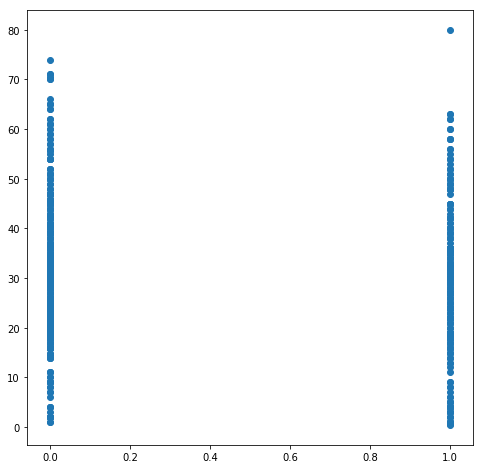

In [41]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_dr_age["Survived"], df_dr_age["Age"])

This is hard to view any kind of correlation, so lets look at this mathematically.

First lets look at the variance of the "Age" parameter for each person (sample).

In [53]:
variance_age = ((df_dr_age["Age"] - df_dr_age["Age"].mean())**2).mean()
n = df_dr_age.shape[0]
variance_age * (n/(n-1))

variance_sur = ((df_dr_age["Survived"] - df_dr_age["Survived"].mean())**2).mean()
variance_sur

0.24119451702249717

And the standard deviation

In [0]:
std_dev_age = variance_age ** 0.5

std_dev_sur = variance_sur ** 0.5

Now lets calculate the Pearsons correlation coefficient for the Age parameter and survived parameters.  Starting with the covariance of each parameter

In [0]:
#@params x - pandas series
#@params y - pandas series
def pear_cor(x, y):
    cov = ((x - x.mean()) * (y - y.mean())).mean()
    std_dev_x = ((x - x.mean())**2).mean()**0.5
    std_dev_y = ((y - y.mean())**2).mean()**0.5
    return cov / (std_dev_x * std_dev_y)


cov = (df_dr_age["Age"] - df_dr_age["Age"].mean()) * (df_dr_age["Survived"] - df_dr_age["Survived"].mean())
cov = cov.mean()


In [70]:
pear_cor_1 = cov / (std_dev_age * std_dev_sur)
pear_cor_1

-0.07722109457217735

In [72]:
pear_cor_test = pear_cor(df_dr_age["Age"], df_dr_age["Survived"])
pear_cor_test

-0.07722109457217735

This appears to be a very weak negative correlation, let us compare it with other Pearsons values for Survived and other parameters.

In [73]:
df_dr_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [79]:
df_dr = df_dr_age.dropna(subset=["Embarked"])
df_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
Famsize        712 non-null int64
Gencat         712 non-null int8
Embarcat       712 non-null int8
dtypes: float64(2), int64(6), int8(2), object(5)
memory usage: 79.3+ KB


In [80]:
df_dr["Famsize"] = df_dr["SibSp"] + df_dr["Parch"]
df_dr["Gencat"] = pd.Categorical(df_dr["Sex"]).codes
df_dr["Embarcat"] = pd.Categorical(df_dr["Embarked"]).codes
df_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
Famsize        712 non-null int64
Gencat         712 non-null int8
Embarcat       712 non-null int8
dtypes: float64(2), int64(6), int8(2), object(5)
memory usage: 79.3+ KB


Famsize  
Gencat  
Embarcat  
Fare  
Age
Pclass

Survived

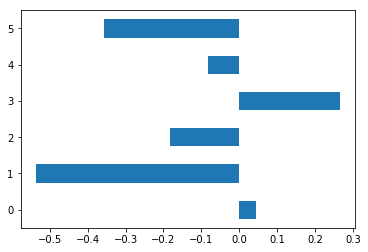

In [90]:
param1 = "Survived"
param2s = ["Famsize", "Gencat", "Embarcat", "Fare", "Age", "Pclass"]
pear_list = []

for a in param2s:
    pear_list.append(pear_cor(df_dr[param1], df_dr[a]))

pear_s = pd.Series(pear_list)

pear_s.plot(kind="barh")
